#### _Librerias utilizadas_

In [1]:
## Traemos las librerias empledas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Carga y análisis datos

In [2]:
df = pd.read_csv(r"C:\Users\pablo\OneDrive\Documentos\HENRY\Proyecto\Inventory\SalesFINAL12312016.csv", parse_dates=['SalesDate'])  # Cargamos el dataset

In [3]:
df.shape #Analizamos la cantidad de filas y columnas del dataset

(1048575, 14)

In [4]:
df.info() # Información general (columnas, tipos de datos, nulos)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   InventoryId     1048575 non-null  object        
 1   Store           1048575 non-null  int64         
 2   Brand           1048575 non-null  int64         
 3   Description     1048575 non-null  object        
 4   Size            1048575 non-null  object        
 5   SalesQuantity   1048575 non-null  int64         
 6   SalesDollars    1048575 non-null  float64       
 7   SalesPrice      1048575 non-null  float64       
 8   SalesDate       1048575 non-null  datetime64[ns]
 9   Volume          1048575 non-null  int64         
 10  Classification  1048575 non-null  int64         
 11  ExciseTax       1048575 non-null  float64       
 12  VendorNo        1048575 non-null  int64         
 13  VendorName      1048575 non-null  object        
dtypes: datetime64[ns](

In [5]:
#Lista de columnas
df.columns

Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'SalesQuantity',
       'SalesDollars', 'SalesPrice', 'SalesDate', 'Volume', 'Classification',
       'ExciseTax', 'VendorNo', 'VendorName'],
      dtype='object')

In [6]:
#Analizamos los primeros 10 registros
df.head(10)

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2016-01-01,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,2016-01-02,750,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2016-01-03,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,2016-01-08,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,2016-01-09,375,1,0.79,12546,JIM BEAM BRANDS COMPANY
5,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,1,34.99,34.99,2016-01-15,375,1,0.39,12546,JIM BEAM BRANDS COMPANY
6,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,1,34.99,34.99,2016-01-22,375,1,0.39,12546,JIM BEAM BRANDS COMPANY
7,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,1,34.99,34.99,2016-01-30,375,1,0.39,12546,JIM BEAM BRANDS COMPANY
8,1_HARDERSFIELD_10058,1,10058,F Coppola Dmd Ivry Cab Svgn,750mL,4,59.96,14.99,2016-01-05,750,2,0.45,2000,SOUTHERN WINE & SPIRITS NE
9,1_HARDERSFIELD_10058,1,10058,F Coppola Dmd Ivry Cab Svgn,750mL,1,14.99,14.99,2016-01-06,750,2,0.11,2000,SOUTHERN WINE & SPIRITS NE


#### Revision de valores unicos

In [7]:
conteo_unicos = df.nunique()
print(conteo_unicos)

InventoryId       170131
Store                 79
Brand               7658
Description         6890
Size                  40
SalesQuantity        141
SalesDollars        3426
SalesPrice           273
SalesDate             60
Volume                22
Classification         2
ExciseTax            468
VendorNo             116
VendorName           117
dtype: int64


#### Revision de nulos y negativos

In [8]:
# Sumar nulos por columna
nulos_por_columna = df.isnull().sum()

# Filtrar solo las que tienen más de 0 nulos
nulos_por_columna = nulos_por_columna[nulos_por_columna > 0]

print(nulos_por_columna)

Series([], dtype: int64)


In [9]:
# Contar valores negativos por columna
negativos_por_columna = (df.select_dtypes(include=[np.number]) < 0).sum()

# Filtrar solo las columnas que tienen al menos un valor negativo
negativos_por_columna = negativos_por_columna[negativos_por_columna > 0]

print(negativos_por_columna)


Series([], dtype: int64)


El dataframe no tiene valores negativos

#### Revision de espacios y formato

In [10]:
#Revisamos si hay espacios en blanco al inicio o al final de las cadenas de texto
espacios = df.apply(lambda col: col.str.contains(r"^\s|\s$", regex=True) if col.dtype == "object" else False)
print(espacios.sum())

InventoryId            0
Store                  0
Brand                  0
Description            0
Size                   0
SalesQuantity          0
SalesDollars           0
SalesPrice             0
SalesDate              0
Volume                 0
Classification         0
ExciseTax              0
VendorNo               0
VendorName        957234
dtype: int64


In [11]:
# Revisamos la fecha de inicio y fin del dataset
fecha_inicio = df['SalesDate'].min()
fecha_fin = df['SalesDate'].max()

print(f"Fecha de inicio del dataset: {fecha_inicio}")
print(f"Fecha de fin del dataset: {fecha_fin}")

Fecha de inicio del dataset: 2016-01-01 00:00:00
Fecha de fin del dataset: 2016-02-29 00:00:00


## Análisis básico descriptivo

### Distribución general

In [17]:
# Estadísticas descriptivas generales
df[['SalesQuantity', 'SalesDollars', 'SalesPrice', 'Volume', 'ExciseTax']].describe()

,SalesQuantity,SalesDollars,SalesPrice,Volume,ExciseTax
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.337619e+00,3.160420e+01,1.543162e+01,9.500280e+02,1.326847e+00
std,3.511492e+00,6.570249e+01,1.404967e+01,7.142708e+02,3.407898e+00
min,1.000000e+00,4.900000e-01,4.900000e-01,5.000000e+01,1.000000e-02
25%,1.000000e+00,1.099000e+01,8.990000e+00,7.500000e+02,1.600000e-01
50%,1.000000e+00,1.799000e+01,1.299000e+01,7.500000e+02,6.800000e-01
75%,2.000000e+00,3.199000e+01,1.899000e+01,1.500000e+03,1.570000e+00
max,4.320000e+02,1.327997e+04,4.999990e+03,2.000000e+04,3.785200e+02


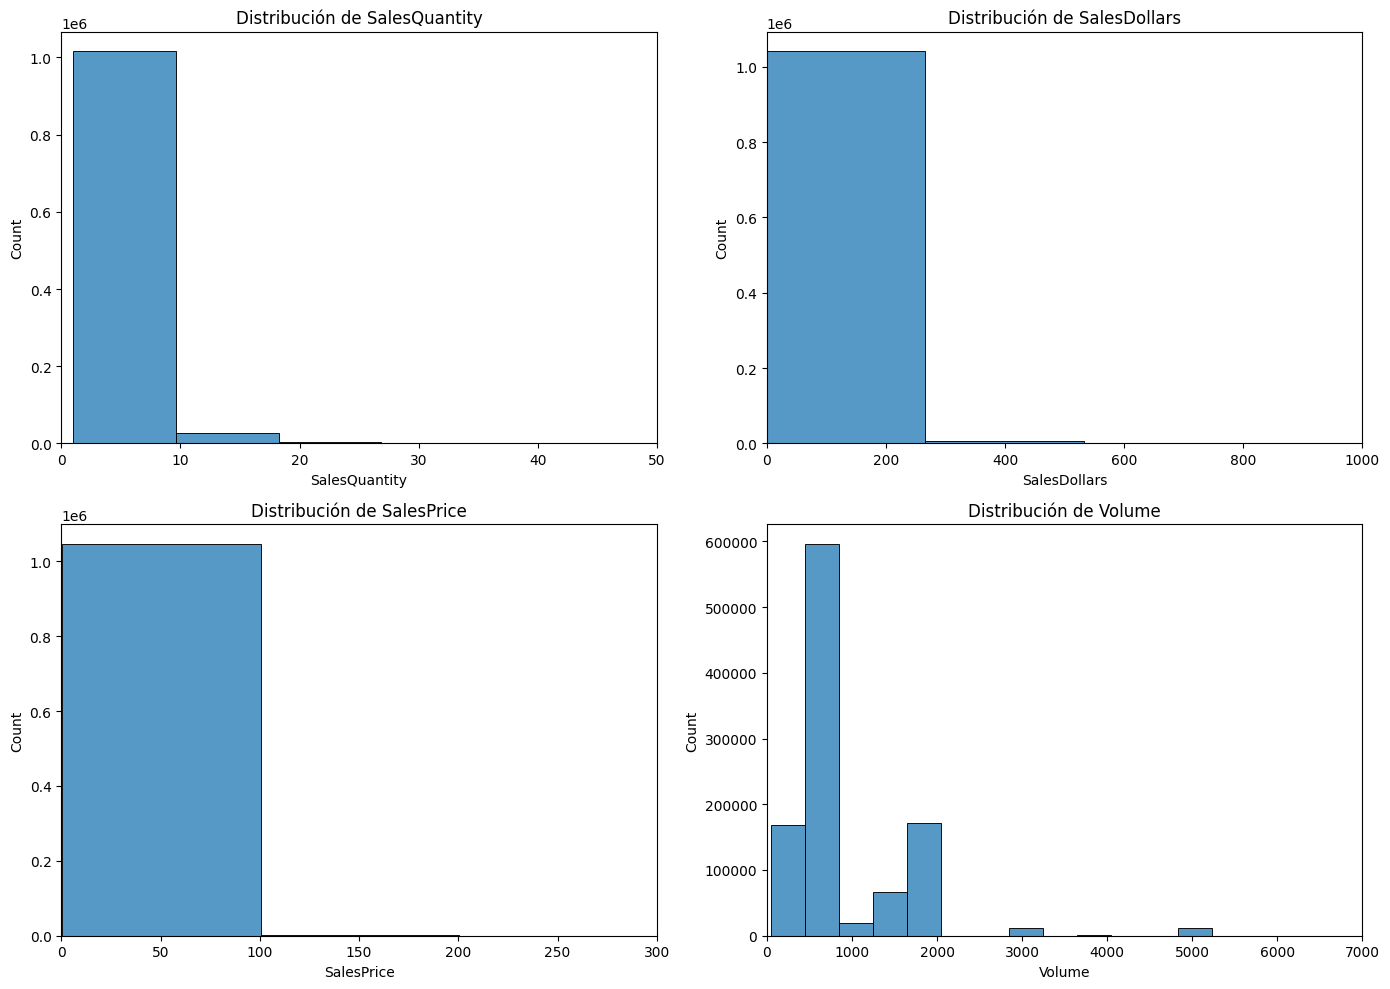

In [ ]:
# Histogramas con límites en el eje X
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(df['SalesQuantity'], bins=50, ax=axes[0,0], kde=False)
axes[0,0].set_title("Distribución de SalesQuantity")
axes[0,0].set_xlim(0, 50)   # límite ajustado

sns.histplot(df['SalesDollars'], bins=50, ax=axes[0,1], kde=False)
axes[0,1].set_title("Distribución de SalesDollars")
axes[0,1].set_xlim(0, 1000)  # límite ajustado

sns.histplot(df['SalesPrice'], bins=50, ax=axes[1,0], kde=False)
axes[1,0].set_title("Distribución de SalesPrice")
axes[1,0].set_xlim(0, 300)  # límite ajustado

sns.histplot(df['Volume'], bins=50, ax=axes[1,1], kde=False)
axes[1,1].set_title("Distribución de Volume")
axes[1,1].set_xlim(0, 7000) # límite ajustado

plt.tight_layout()
plt.show()

### Top-N análisis

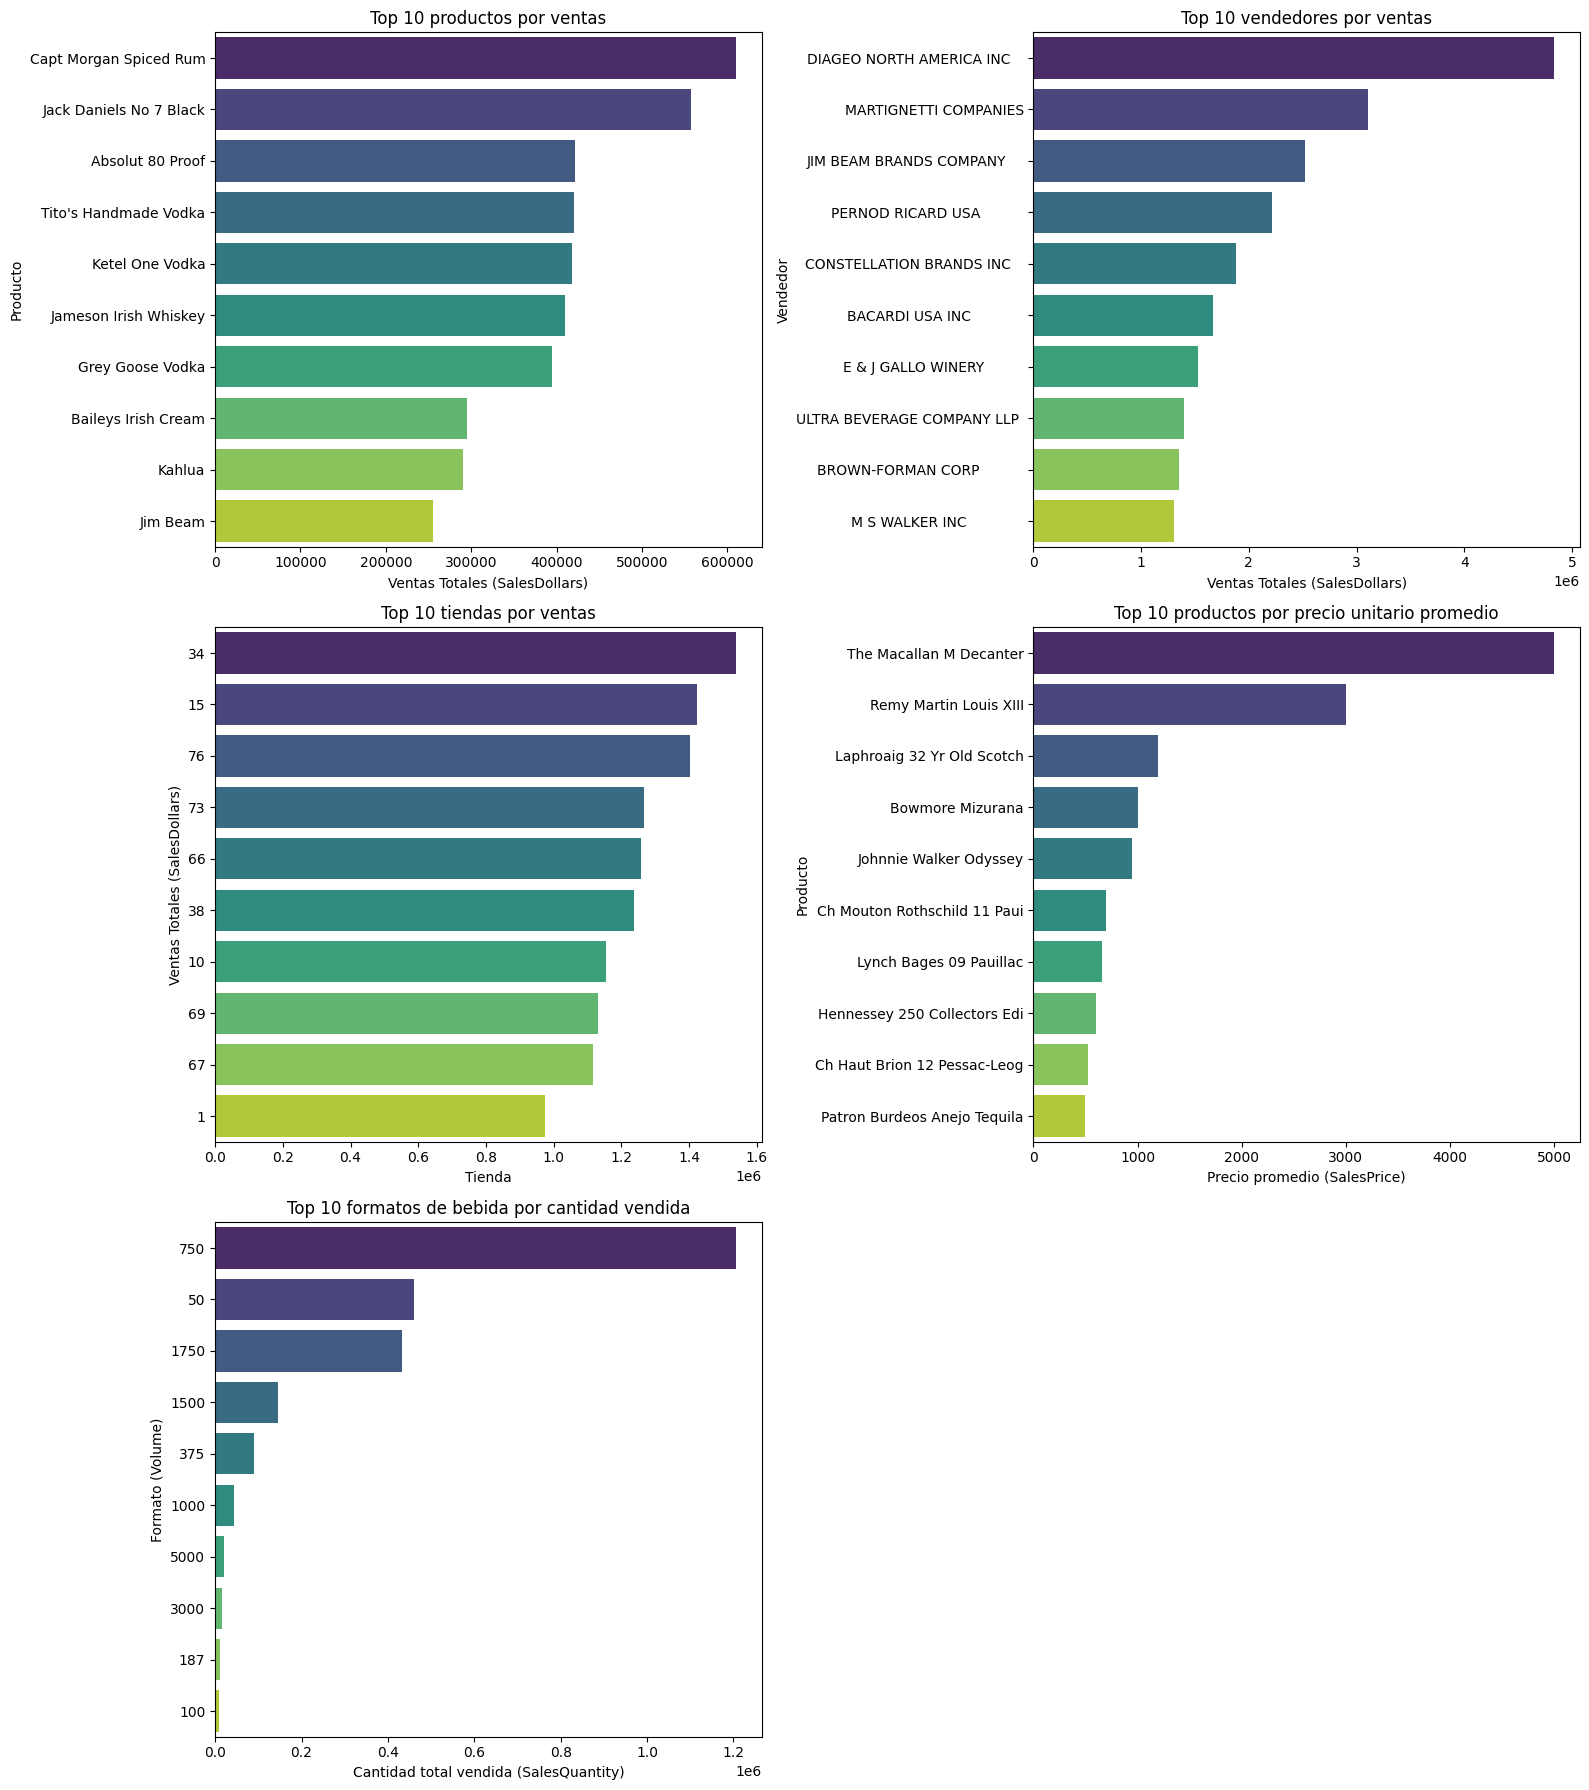

In [45]:
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
axes = axes.flatten()

# Top productos por ventas
sns.barplot(x=top_products.values, y=top_products.index, hue=top_products.index, palette="viridis", ax=axes[0], legend=False)
axes[0].set_title("Top 10 productos por ventas")
axes[0].set_xlabel("Ventas Totales (SalesDollars)")
axes[0].set_ylabel("Producto")

# Top vendedores por ventas
sns.barplot(x=top_vendors.values, y=top_vendors.index, hue=top_vendors.index, palette="viridis", ax=axes[1], legend=False)
axes[1].set_title("Top 10 vendedores por ventas")
axes[1].set_xlabel("Ventas Totales (SalesDollars)")
axes[1].set_ylabel("Vendedor")

# Top tiendas por ventas
sns.barplot(x=top_stores.values, y=top_stores.index.astype(str), hue=top_stores.index.astype(str), palette="viridis", ax=axes[2], legend=False)
axes[2].set_title("Top 10 tiendas por ventas")
axes[2].set_xlabel("Tienda")
axes[2].set_ylabel("Ventas Totales (SalesDollars)")


# Top productos por precio promedio
sns.barplot(x=top_prices.values, y=top_prices.index, hue=top_prices.index, palette="viridis", ax=axes[3], legend=False)
axes[3].set_title("Top 10 productos por precio unitario promedio")
axes[3].set_xlabel("Precio promedio (SalesPrice)")
axes[3].set_ylabel("Producto")

# Top formatos de bebida por cantidad vendida
sns.barplot(x=top_volumes.values, y=top_volumes.index.astype(str), hue=top_volumes.index.astype(str), palette="viridis", ax=axes[4], legend=False)
axes[4].set_title("Top 10 formatos de bebida por cantidad vendida")
axes[4].set_xlabel("Cantidad total vendida (SalesQuantity)")
axes[4].set_ylabel("Formato (Volume)")

# Ocultar subplot vacío si no se usa
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

### Heatmap con correlacion mayor al 0.5

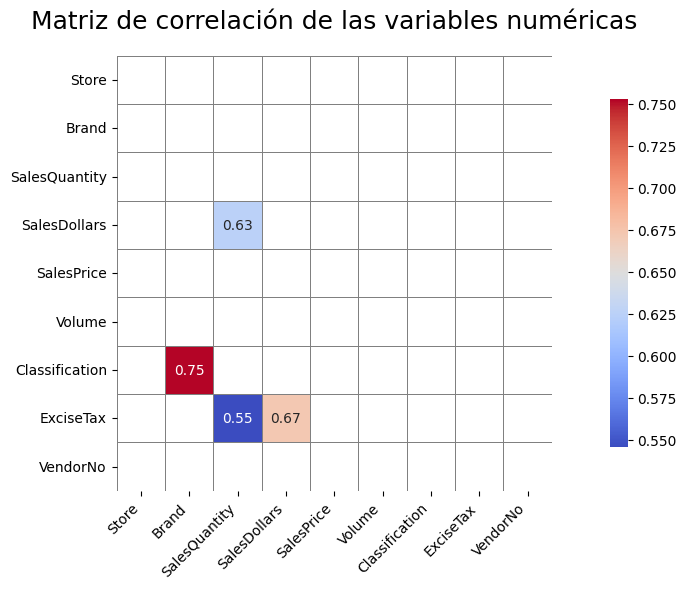

In [18]:
# Seleccionamos solo las columnas numéricas
numeric_df = df.select_dtypes(include=[np.number])

# Matriz de correlación
correlation_matrix = numeric_df.corr()

# Máscara para triángulo superior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Filtrar correlaciones fuertes
correlation_matrix_filtered = correlation_matrix[(abs(correlation_matrix) > 0.5)]

# Crear el heatmap
plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(
    correlation_matrix_filtered,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,              # líneas entre celdas
    linecolor='gray',            # color de líneas
    cbar_kws={'shrink': 0.8},    # barra de color más compacta
    square=True,                 # celdas cuadradas
    annot_kws={"size": 10},      # tamaño de texto
)

plt.title('Matriz de correlación de las variables numéricas', fontsize=18, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.grid(False)  # desactiva grid externo (ya hay líneas internas)
plt.tight_layout()
plt.show()

#### 1. Análisis de classification vs brand

_Este análisis verifica si la columna classification es una derivación directa de brand, como sugiere el diccionario. Se espera confirmar que la regla brand < 10000 → 1 y brand ≥ 10000 → 2 se cumple._

In [20]:
# Creamos una columna auxiliar que aplica la regla esperada
df['check_classification'] = df['Brand'].apply(lambda x: 1 if x < 10000 else 2)

# Comparamos si coincide con la columna original classification
coincidencia = (df['check_classification'] == df['Classification']).mean()

# Mostramos el porcentaje de coincidencia
print(f"Coincidencia entre brand y classification: {coincidencia:.2%}")

# Eliminamos la columna auxiliar si no se necesita
df.drop(columns='check_classification', inplace=True)

Coincidencia entre brand y classification: 92.12%


Al ver que classification coicide con la marca pasamos a analizar en mayor profundidad la columna en sí

_Este análisis busca identificar cuál de los dos valores de classification (1 o 2) genera mayor volumen de ventas. Esto puede indicar si un grupo de productos tiene mayor rotación o demanda._

##### Análisis de precios promedio por classification

_Este análisis evalúa si los productos de una clasificación tienen precios unitarios más altos en promedio. Esto puede reflejar diferencias de posicionamiento entre grupos de productos._

Precio promedio por clasificación:
Classification
1    16.973149
2    13.272448
Name: SalesPrice, dtype: float64


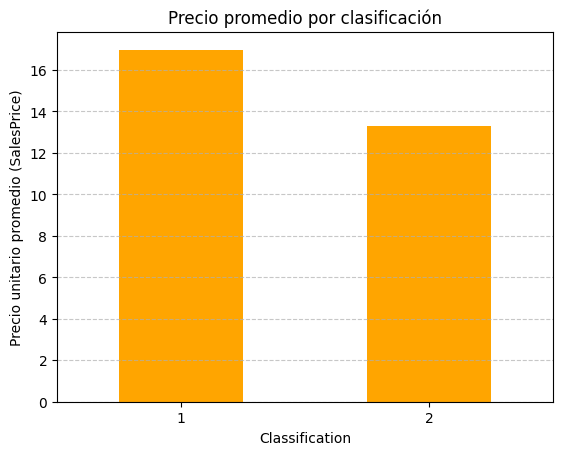

In [27]:
# Calculamos el precio promedio por clasificación
precio_promedio = df.groupby('Classification')['SalesPrice'].mean()

# Mostramos los resultados
print("Precio promedio por clasificación:")
print(precio_promedio)

# Visualizamos con gráfico de barras
precio_promedio.plot(kind='bar', color='orange')
plt.title("Precio promedio por clasificación")
plt.xlabel("Classification")
plt.ylabel("Precio unitario promedio (SalesPrice)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.show()

##### Comparación de la distribución de precios por clasificación

_Este análisis compara la distribución de precios unitarios (salesprice) entre los dos grupos definidos por classification. Se busca identificar diferencias en rango, concentración y presencia de productos de mayor valor._

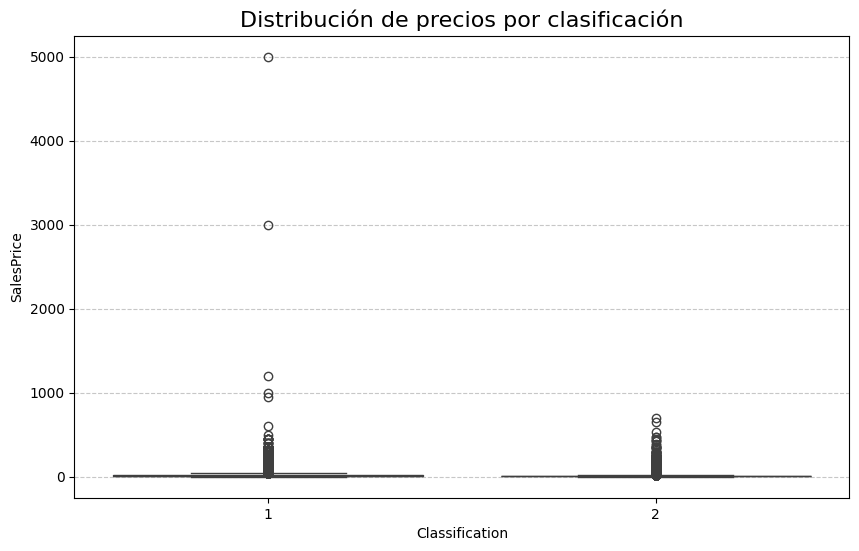

In [35]:
# Creamos un boxplot para comparar la distribución de precios por clasificación
plt.figure(figsize=(10, 6))

# Usamos seaborn para graficar salesprice segmentado por classification
sns.boxplot(x='Classification', y='SalesPrice', data=df)

# Título y etiquetas
plt.title("Distribución de precios por clasificación", fontsize=16)
plt.xlabel("Classification")
plt.ylabel("SalesPrice")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


LA INFORMACION PARECE SER INSUFICIENTE PARA AFIRMAR QUE LA CLASIFICACION DE UN PRODUCTO SE DEBA A SU PRECIO

#### 2. Análisis de salesdollars vs excisetax

_Este análisis evalúa si el impuesto se aplica por unidad vendida. Se espera que el valor de excisetax esté relacionado con salesquantity._

In [37]:
# Calculamos el impuesto por unidad vendida
df['tax_per_unit'] = df['ExciseTax'] / df['SalesQuantity']

# Mostramos estadísticas del impuesto unitario
print("Distribución del impuesto por unidad vendida (ExciseTax / SalesQuantity):")
print(df['tax_per_unit'].describe())

# Visualizamos los productos con mayor impuesto unitario promedio
top_taxed_brands = df.groupby('Brand')['tax_per_unit'].mean().sort_values(ascending=False).head(10)
print("Top 10 marcas con mayor impuesto unitario promedio:")
print(top_taxed_brands)

# Eliminamos la columna auxiliar si no se necesita
df.drop(columns='tax_per_unit', inplace=True)

Distribución del impuesto por unidad vendida (ExciseTax / SalesQuantity):
count    1.048575e+06
mean     6.073688e-01
std      6.233176e-01
min      6.666667e-03
25%      1.100000e-01
50%      3.900000e-01
75%      7.900000e-01
max      3.000000e+00
Name: tax_per_unit, dtype: float64
Top 10 marcas con mayor impuesto unitario promedio:
Brand
23047    3.00
24144    2.70
29427    2.70
20650    2.70
3955     1.84
3573     1.84
3564     1.84
3304     1.84
4576     1.84
4308     1.84
Name: tax_per_unit, dtype: float64


##### Conclusión

 Distribución general del impuesto por unidad
- Media ≈ 0.61 y mediana ≈ 0.39 → la distribución está sesgada a la derecha, lo que indica que hay productos con impuestos unitarios significativamente más altos que el promedio.
- Desviación estándar ≈ 0.62 → hay bastante dispersión, lo que sugiere que el impuesto no es uniforme entre productos.
- Rango amplio: desde 0.0067 hasta 3.00 → algunos productos pagan casi nada por unidad, mientras que otros tienen una carga fiscal muy alta.
- El 25% de los productos paga menos de 0.11 por unidad, mientras que el 25% superior paga más de 0.79 → hay una clara diferencia entre productos de baja y alta carga fiscal.

🏷️ Marcas con mayor impuesto unitario promedio
- Las marcas 23047, 24144, 29427, 20650 tienen un impuesto unitario promedio de 2.70 a 3.00, muy por encima del promedio general.
- Las siguientes marcas (3955, 3573, etc.) rondan los 1.84, también bastante elevadas.
- Esto sugiere que hay un subconjunto de marcas que están fuertemente gravadas, posiblemente por tipo de producto, volumen, o categoría fiscal.

🧠 Conclusión general
El impuesto por unidad vendida varía considerablemente entre productos y marcas. Aunque la mayoría paga menos de 1 peso por unidad, existe un grupo de marcas con impuestos unitarios muy altos (hasta 3 pesos), lo que podría indicar productos premium, bebidas con mayor graduación alcohólica, o categorías con mayor carga fiscal. Este patrón sugiere que el impuesto no es proporcional al volumen de ventas, sino que está influenciado por características específicas del producto.

_Este análisis evalúa si el impuesto se aplica por unidad vendida. Se espera que el valor de excisetax esté relacionado con salesquantity._

#### 3. Análisis de salesquantity vs salesdollars

_Este análisis valida la relación esperada entre cantidad vendida (salesquantity) y monto total (salesdollars). Se busca confirmar que la fórmula salesquantity × salesprice ≈ salesdollars se cumple._

In [ ]:
# Calculamos el monto esperado de la venta
df['expected_sales'] = df['salesquantity'] * df['salesprice']

# Calculamos la diferencia con el valor registrado
df['sales_diff'] = df['salesdollars'] - df['expected_sales']

# Mostramos estadísticas de la diferencia
print("Diferencia entre SalesDollars y SalesQuantity × SalesPrice:")
print(df['sales_diff'].describe())

# Graficamos la relación entre cantidad y monto
sns.scatterplot(x='salesquantity', y='salesdollars', data=df, alpha=0.3)
plt.title("Relación entre SalesQuantity y SalesDollars")
plt.xlabel("SalesQuantity")
plt.ylabel("SalesDollars")
plt.grid(True)
plt.show()

# Eliminamos columnas auxiliares si no se necesitan
df.drop(columns=['expected_sales', 'sales_diff'], inplace=True)

### Analisis de distribucion de las variables

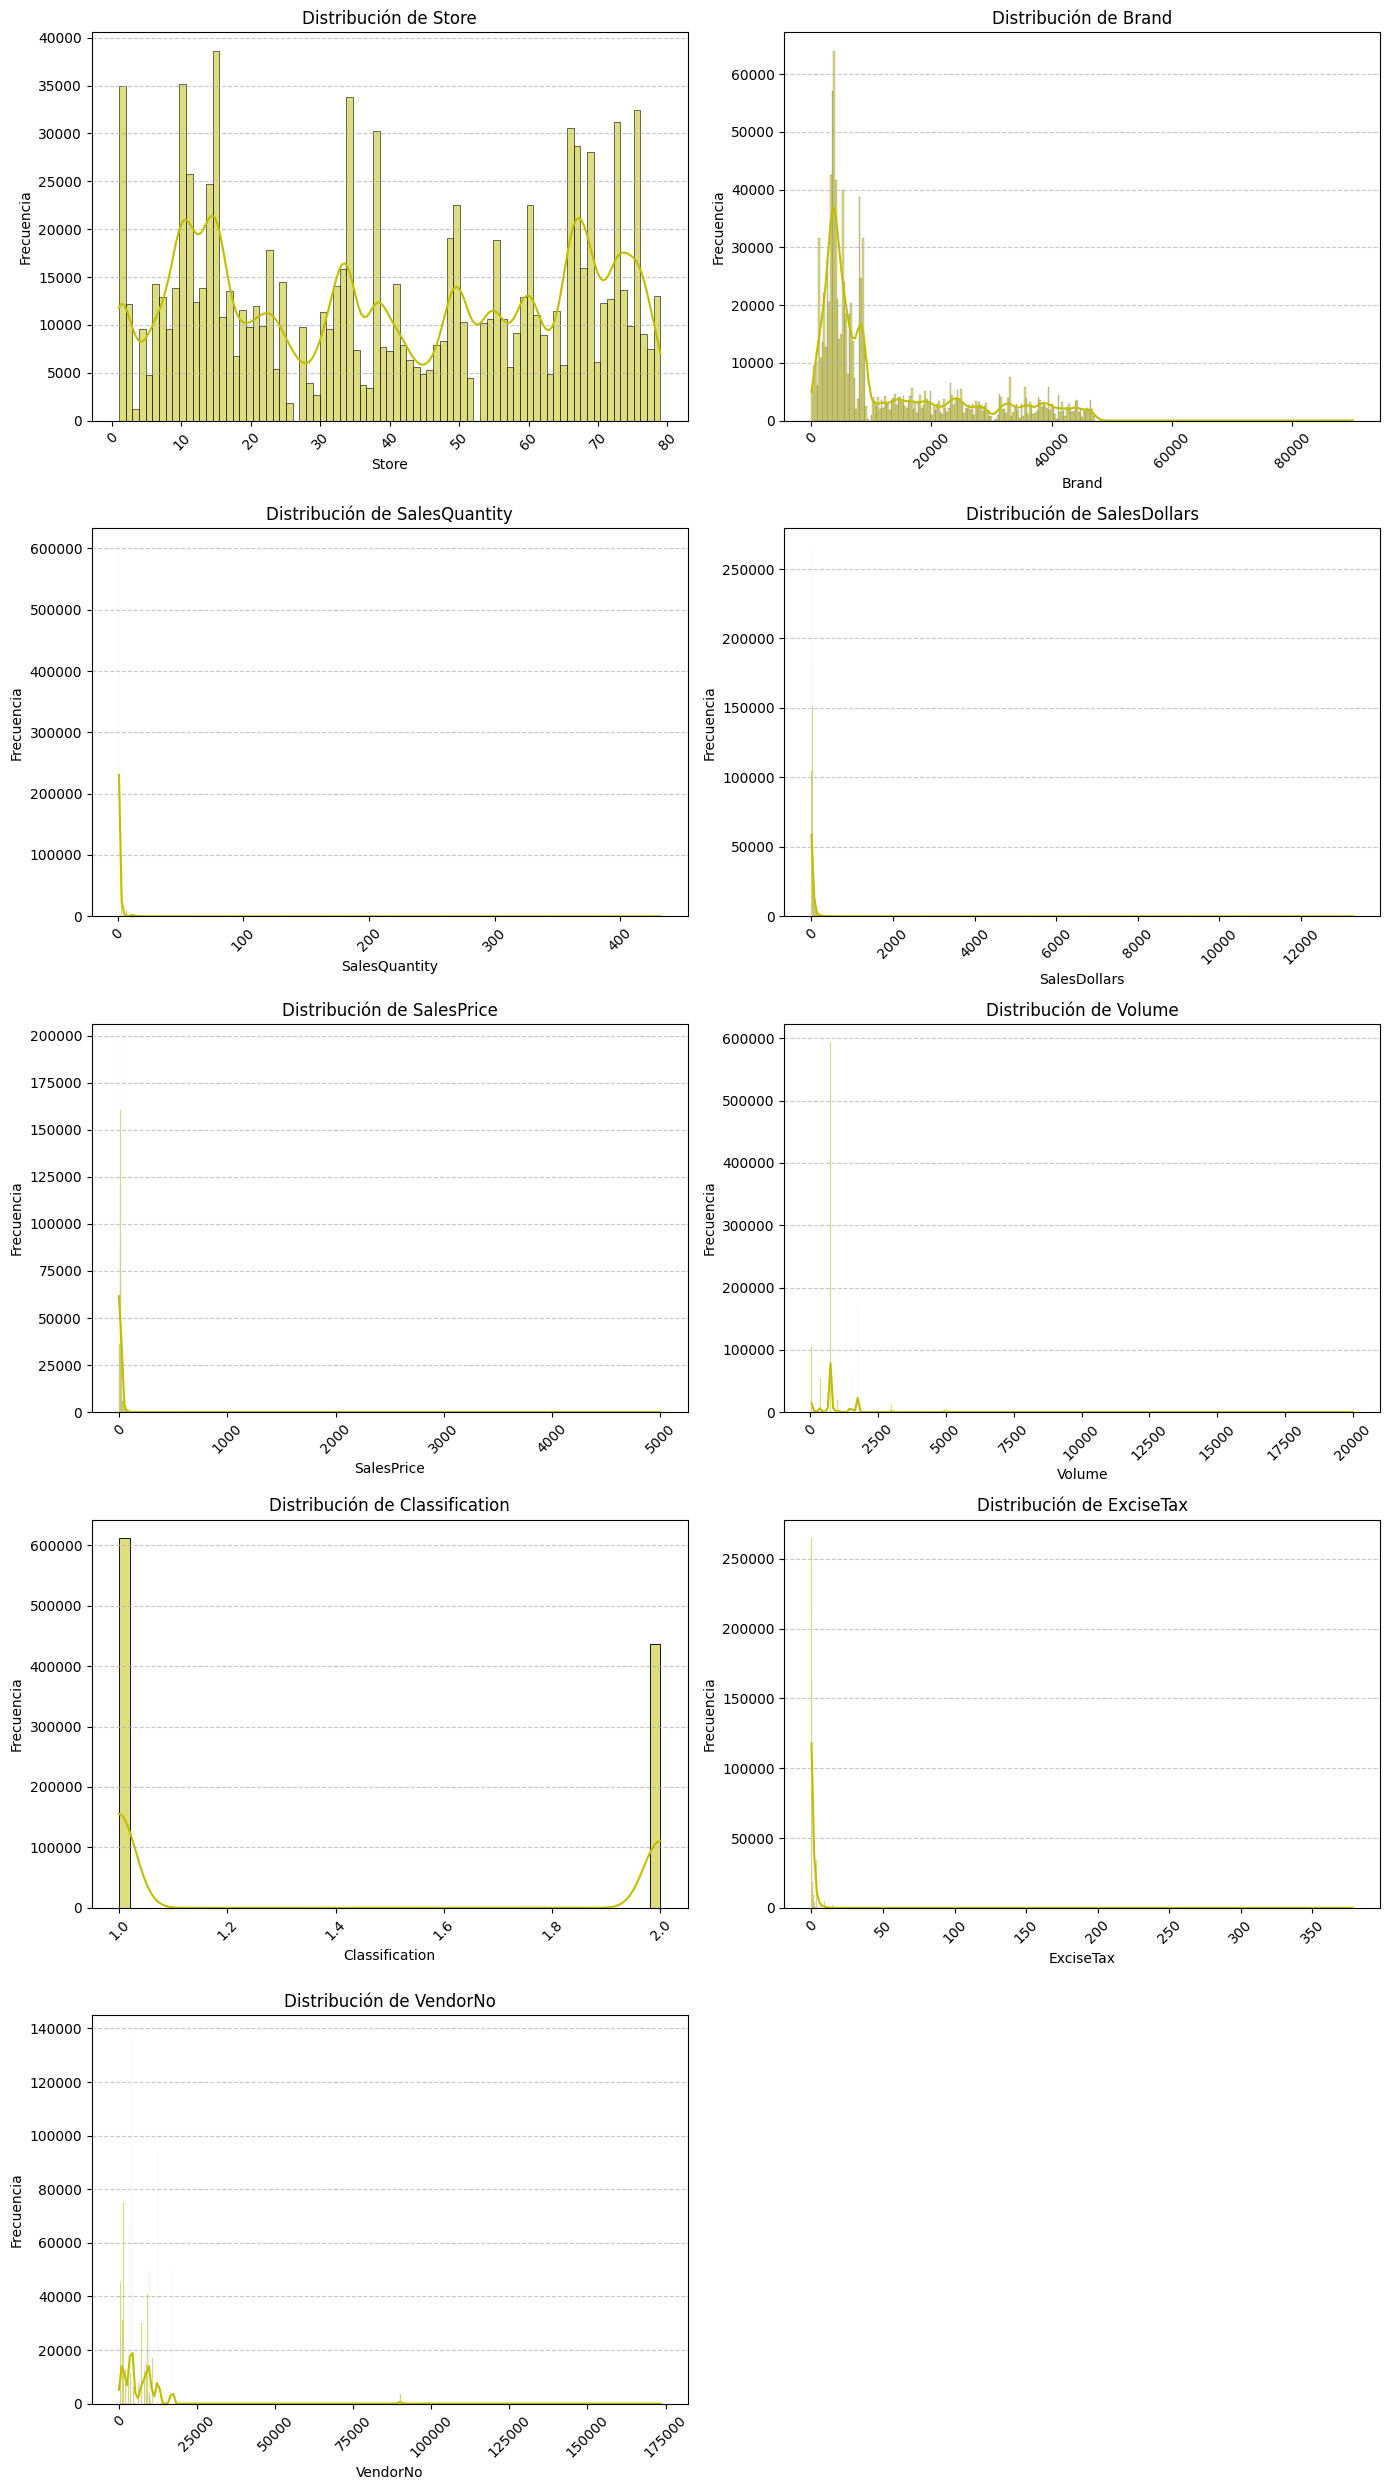

In [15]:
# Seleccionar todas las columnas numéricas
cols_numericas = df.select_dtypes(include='number').columns.tolist()

# Configurar subplots: 2 columnas por fila
n = len(cols_numericas)
filas = (n + 1) // 2  # redondeo hacia arriba
fig, axes = plt.subplots(filas, 2, figsize=(14, 5 * filas))
axes = axes.flatten()  # convertir a lista plana

# Graficar cada columna
for i, col in enumerate(cols_numericas):
    sns.histplot(df[col], kde=True, color='y', edgecolor='black', ax=axes[i])
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Ocultar subplots vacíos si hay número impar
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Outliers

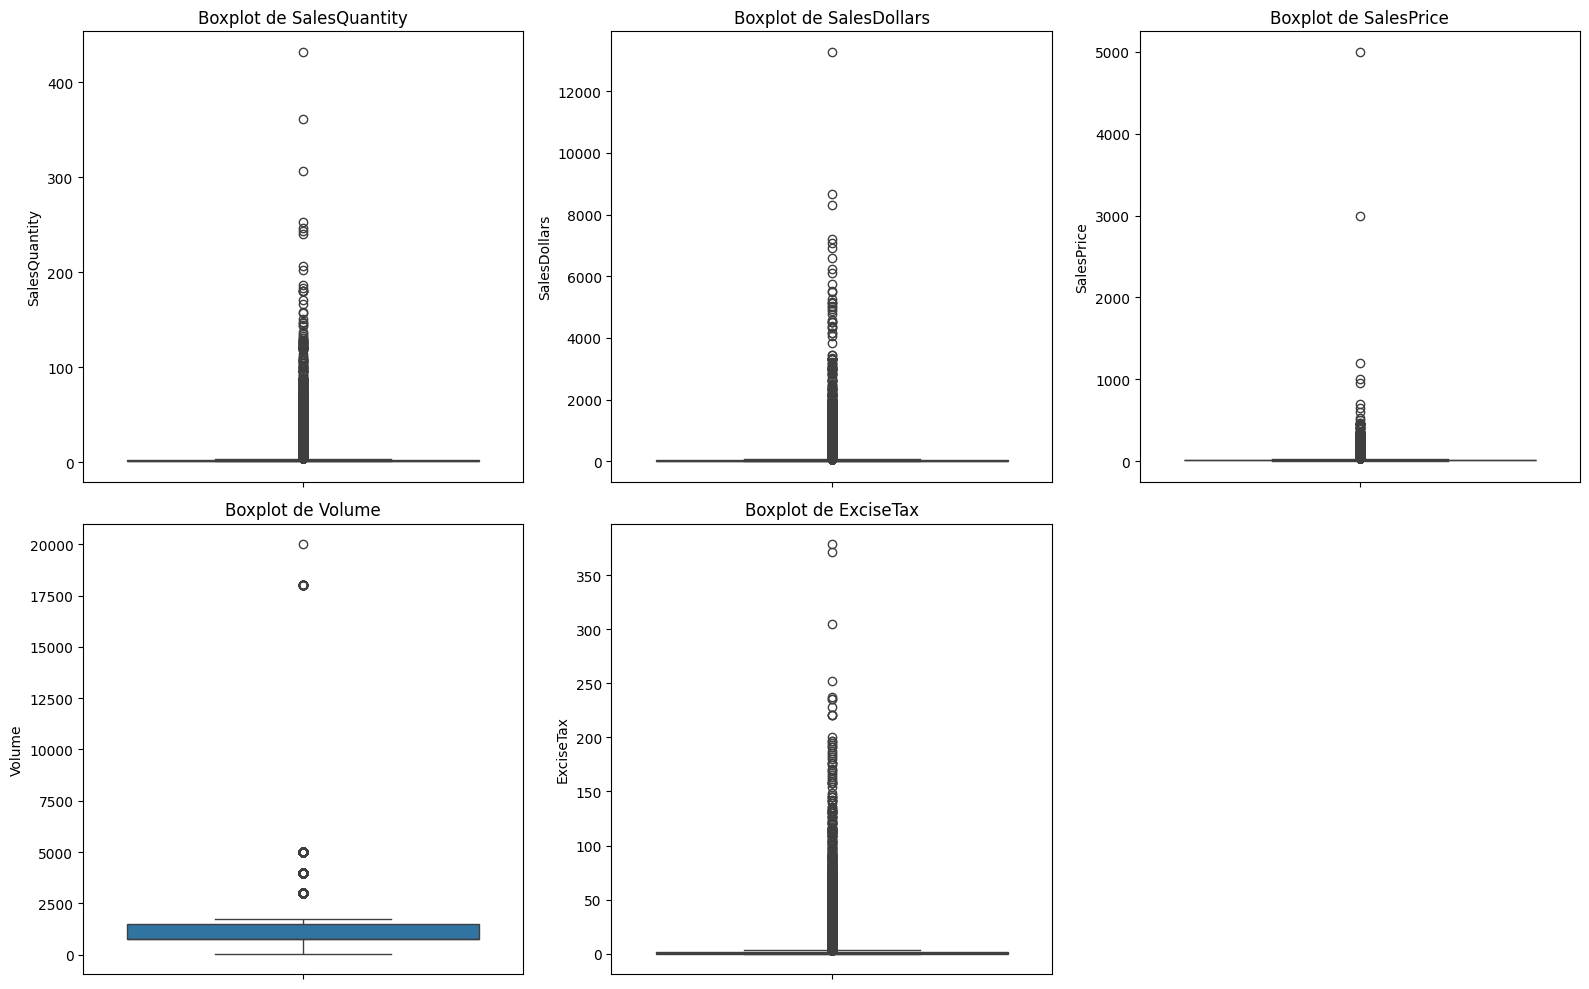

In [16]:
# Boxplots de variables numéricas
num_cols = ['SalesQuantity', 'SalesDollars', 'SalesPrice', 'Volume', 'ExciseTax']
plt.figure(figsize=(16,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot de {col}")
plt.tight_layout()
plt.show()